# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome', executable_path='C:/Program Files/chromedriver.exe')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup object
html = browser.html
soup_obj = soup(html, "html.parser")


In [6]:
# Scrape the data from the HTML table
table = soup_obj.find("table")
rows = table.find_all("tr")

data = []
header_row = rows[0].find_all("th")  # Extract header cells instead of first row cells
header = [cell.text.strip() for cell in header_row]
data.append(header)

for row in rows[1:]:  # Exclude the header row
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

# Convert the scraped data into a pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract the data from each row
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    
    # Add the row data to the list
    data.append(row_data)


In [8]:
# Create a list of column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame using the list of rows and the column names
df = pd.DataFrame(data, columns=column_names)


In [9]:
# Print the DataFrame
print(df)


        id terrestrial_date   sol    ls month min_temp pressure
0     None             None  None  None  None     None     None
1        2       2012-08-16    10   155     6    -75.0    739.0
2       13       2012-08-17    11   156     6    -76.0    740.0
3       24       2012-08-18    12   156     6    -76.0    741.0
4       35       2012-08-19    13   157     6    -74.0    732.0
...    ...              ...   ...   ...   ...      ...      ...
1863  1889       2018-02-23  1973   133     5    -78.0    730.0
1864  1892       2018-02-24  1974   134     5    -77.0    729.0
1865  1894       2018-02-25  1975   134     5    -76.0    729.0
1866  1893       2018-02-26  1976   135     5    -77.0    728.0
1867  1895       2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                       object
min_temp                    object
pressure                    object
dtype: object


In [15]:
# Convert data types
df['ls'] = pd.to_numeric(df['ls'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')


In [16]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print("Number of months on Mars:", num_months)

Number of months on Mars: 12


In [18]:
# 2. How many Martian days' worth of data are there?
num_martian_days = df['sol'].nunique()
print("Number of Martian days:", num_martian_days)

Number of Martian days: 1868


In [19]:
# 3. What is the average low temperature by month?
# Group the data by month and calculate the average low temperature
avg_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display the average low temperature by month
avg_low_temp_by_month

month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64

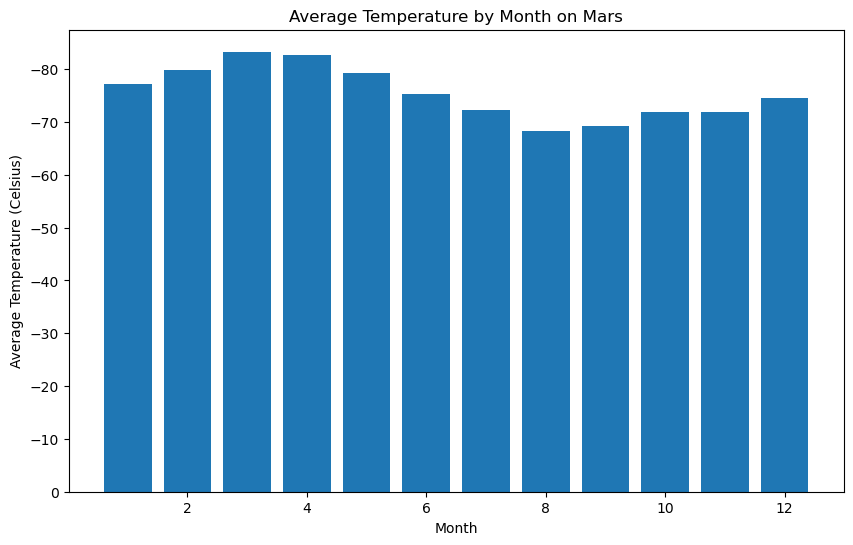

In [21]:
# Plot the average temperature by month
# Calculate the average temperature by month
avg_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
plt.bar(avg_temp_by_month.index, avg_temp_by_month)
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.title('Average Temperature by Month on Mars')
plt.xticks(rotation=0)
plt.gca().invert_yaxis()  # Flip the y-axis
plt.show()

In [22]:
# Identify the coldest and hottest months in Curiosity's location
# Identify the coldest and hottest months
coldest_month = avg_temp_by_month.idxmin()
hottest_month = avg_temp_by_month.idxmax()

coldest_month, hottest_month

(3.0, 8.0)

In [23]:
# 4. Average pressure by Martian month
# Calculate average pressure by Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

avg_pressure_by_month

month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64

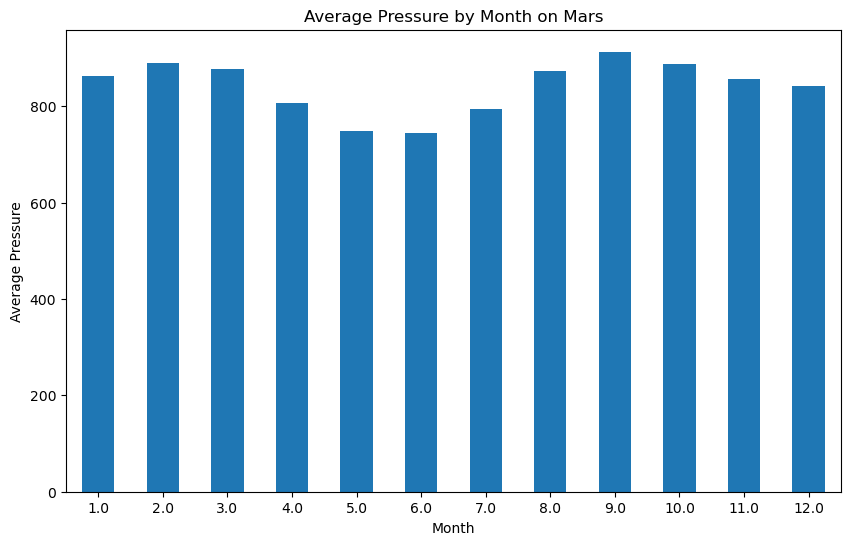

In [24]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month on Mars')
plt.xticks(rotation=0)
plt.show()

In [26]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Calculate the number of terrestrial days in a Martian year
first_terrestrial_date = df['terrestrial_date'].min()
last_terrestrial_date = df['terrestrial_date'].max()
total_terrestrial_days = (last_terrestrial_date - first_terrestrial_date).days

total_sols = len(df)
average_terrestrial_days_per_sol = total_terrestrial_days / total_sols
martian_year_in_terrestrial_days = average_terrestrial_days_per_sol * 687

print(f"There are approximately {martian_year_in_terrestrial_days:.2f} terrestrial days in a Martian year.")


There are approximately 743.27 terrestrial days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [28]:
browser.quit()